<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#DLA---Diffusion-limited-aggregation" data-toc-modified-id="DLA---Diffusion-limited-aggregation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DLA - Diffusion-limited aggregation</a></span></li></ul></div>

In [1]:
# Pkg.clone("https://github.com/goropikari/LinuxNotifier.jl")
using Plots, ProgressMeter, LinuxNotifier
pyplot(axis=false, colorbar=false, size=(200,200), leg=false, c=:blues)

INFO: Recompiling stale cache file /home/arch/.julia/lib/v0.6/ProgressMeter.ji for module ProgressMeter.
INFO: Recompiling stale cache file /home/arch/.julia/lib/v0.6/WAV.ji for module WAV.


Plots.PyPlotBackend()

In [2]:
ct = 0

0

# DLA - Diffusion-limited aggregation

In [3]:
mutable struct Particle
    fix::Bool
    x::Int
    y::Int
    
    function Particle(x,y)
        new(false, x, y)
    end
end

In [4]:
function DLA(L, r, N, step, d::Int=100)
    if iseven(L)
        error("L have to be odd.")
    end
    dir = Dict(1=>(1,0), 2=>(-1,0), 3=>(0,1), 4=>(0,-1))
    
    cen = div(L,2) + 1
    site = falses(L, L)
    site[cen, cen] = true
    particles = [Particle(round(Int, cen + r*cos(theta)), cen + round(Int, r*sin(theta))) 
                    for theta in linspace(0,2pi, N)]
    ct = 1
    
    function updatepos(particle::Particle)
        if particle.fix
            return
        end

        x, y = particle.x, particle.y
        a, b = dir[rand(1:4)]
        x += a
        y += b

        x = mod1(x, L)
        y = mod1(y, L)

        if any([ site[mod1(x+1, L), y], site[mod1(x-1, L), y], site[x, mod1(y+1, L)], site[x, mod1(y-1, L)] ])
            particle.fix = true
            site[x,y] = true
            ct += 1
        end

        particle.x = x; particle.y = y;

        return
    end
    
    @showprogress for i in 1:step
        updatepos.(particles)
        if ct > round(Int, 0.95 * N) && iszero(mod(i,d))
            break
        end
    end
    @show sum(site)

    return site
end


function DLAlin(L, N, step, judge::Int=200)
    if iseven(L)
        error("L have to be odd.")
    end
    
    dir = Dict(1=>(1,0), 2=>(-1,0), 3=>(0,1), 4=>(0,-1))
    
    cen = div(L,2) + 1
    site = falses(L, L)
    site[:,end] = true
    particles = [Particle(mod1(i, L), cen) for i in 1:N]
    ct = 0
    
    function updatepos(particle::Particle)
        if particle.fix
            return
        end

        x, y = particle.x, particle.y
        a, b = dir[rand(1:4)]
        x += a
        if y + b > 0
            y += b
        end

        x = mod1(x, L)
        y = mod1(y, L)

        if any([ site[mod1(x+1, L), y], site[mod1(x-1, L), y], site[x, mod1(y+1, L)] ])
            particle.fix = true
            site[x,y] = true
            ct += 1
        end

        particle.x = x; particle.y = y;

        return
    end
    
    @time @showprogress for i in 1:step
        updatepos.(particles)
        if ct > round(Int, 0.9 * N) && iszero(mod(i,judge))
            break
        end
    end
    @show sum(site)
    heatmap(rotl90(site))
    
    return site
end

DLAlin (generic function with 2 methods)

Progress:  15%|██████                                   |  ETA: 0:05:27

sum(site) = 4752


Progress: 100%|█████████████████████████████████████████| Time: 0:00:58



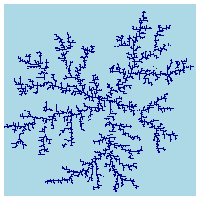

In [16]:
L = 201
r = ceil(div(L, 2))
N = 5000
step = 100_000
sitecore = DLA(L, r, N, step, 200)
alarm()
heatmap(sitecore)

Progress:   6%|███                                      |  ETA: 0:05:24

 21.674140 seconds (74.98 M allocations: 3.359 GiB, 5.69% gc time)
sum(site) = 3569


Progress: 100%|█████████████████████████████████████████| Time: 0:00:22



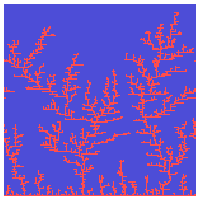

In [19]:
L = 151
N = 4000
step = 100_000
sitelin = DLAlin(L, N, step, 200)
alarm()
heatmap(rotl90(sitelin), c=:lighttest)


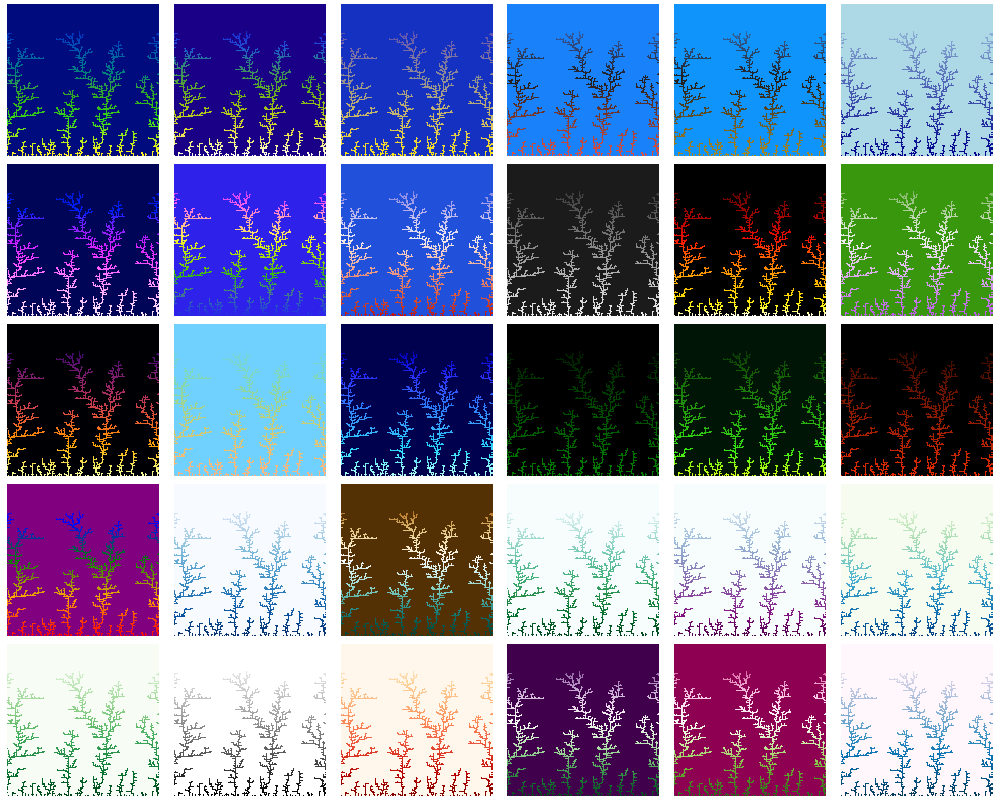

In [18]:
# site = sitecore
site = sitelin
l = size(site)[1]
# colorsite = site
colorsite = zeros(Int, l,l)
for i in 1:l, j in 1:l
    if site[i,j]
        colorsite[i,j] = j
    end
end

a1 = heatmap(rotl90(colorsite), c=:bgy)
a2 = heatmap(rotl90(colorsite), c=:bgyw)
a3 = heatmap(rotl90(colorsite), c=:bjy)
a4 = heatmap(rotl90(colorsite), c=:bkr)
a5 = heatmap(rotl90(colorsite), c=:bky)
a6 = heatmap(rotl90(colorsite), c=:blues)
a7 = heatmap(rotl90(colorsite), c=:bmw)
a8 = heatmap(rotl90(colorsite), c=:colorwheel)
a9 = heatmap(rotl90(colorsite), c=:coolwarm)
a10 = heatmap(rotl90(colorsite), c=:dimgray)
a11 = heatmap(rotl90(colorsite), c=:fire)
a12 = heatmap(rotl90(colorsite), c=:gwv)
a13 = heatmap(rotl90(colorsite), c=:inferno)
a14 = heatmap(rotl90(colorsite), c=:isolum)
a15 = heatmap(rotl90(colorsite), c=:kdc)
a16 = heatmap(rotl90(colorsite), c=:kg)
a17 = heatmap(rotl90(colorsite), c=:kgy)
a18 = heatmap(rotl90(colorsite), c=:kr)
a19 = heatmap(rotl90(colorsite), c=:rainbow)
a20 = heatmap(rotl90(colorsite), c=:Blues)
a21 = heatmap(rotl90(colorsite), c=:BrBG)
a22 = heatmap(rotl90(colorsite), c=:BuGn)
a23 = heatmap(rotl90(colorsite), c=:BuPu)
a24 = heatmap(rotl90(colorsite), c=:GnBu)
a25 = heatmap(rotl90(colorsite), c=:Greens)
a26 = heatmap(rotl90(colorsite), c=:Greys)
a27 = heatmap(rotl90(colorsite), c=:OrRd)
a28 = heatmap(rotl90(colorsite), c=:PRGn)
a29 = heatmap(rotl90(colorsite), c=:PiYG)
a30 = heatmap(rotl90(colorsite), c=:PuBu)

fig = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, 
    a11, a12, a13, a14, a15, a16, a17, a18, a19,
    a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30]
plot(fig..., layout=length(fig), aspect_ratio=:equal, size=(1000, 800))


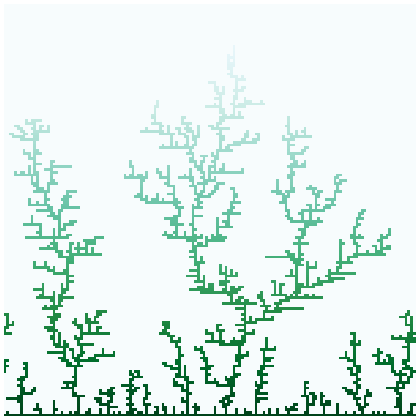

In [7]:
heatmap(rotl90(colorsite), c=:BuGn, size=(420, 420))

In [9]:
ct += 1
savefig(@sprintf("%05d.png", ct))
writecsv(@sprintf("%05d.csv", ct), colorsite)